# Очистка руды

Проект по анализу данных по очистке руды.

Основные цели проекта:
 - Обработать данные
 - Проанализировать данные
 - Обучить модель предсказывать эффективность обогащения

Процесс очистки руды разделен на несколько этапов: флотация, первичная очистка, вторичная очистка. Нам доступно 3 датасета: тренировочный, тестовый и полный.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import sklearn as skl
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.RandomState(42);

## Подготовка данных

### Загрузка данных

In [2]:
try:
    train_set = pd.read_csv("gold_recovery_train_new.csv")
    test_set = pd.read_csv("gold_recovery_test_new.csv")
    full_set = pd.read_csv("gold_recovery_full_new.csv")
except:
    train_set = pd.read_csv("/datasets/gold_recovery_train_new.csv")
    test_set = pd.read_csv("/datasets/gold_recovery_test_new.csv")
    full_set = pd.read_csv("/datasets/gold_recovery_full_new.csv")

#### Train set

In [3]:
train_set.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5351,2017-02-04 15:59:59,7.561775,11.277356,14.772874,41.885446,70.755311,10.788319,3.853571,8.231798,3.543876,...,25.011146,-499.791423,22.945078,-500.264202,23.008423,-499.432909,20.009943,-499.935616,25.011898,-599.474714
4627,2016-08-29 11:59:59,4.203582,10.844220,7.061929,46.365194,52.021786,7.989551,2.650621,9.270781,3.429491,...,11.948399,-500.310994,7.971476,-500.553438,7.945115,-505.639327,4.982226,-500.314782,24.949593,-500.944729
2820,2016-06-06 08:59:59,3.939412,9.028539,7.933384,46.868205,59.443583,7.377918,1.718367,10.359901,2.953683,...,9.922839,-499.097413,8.016230,-502.921684,7.950181,-499.841728,5.990436,-500.539224,18.026694,-498.882824
7829,2017-06-07 11:59:59,4.653997,10.621529,7.566753,45.008186,52.636710,8.352781,2.727410,9.806659,2.828500,...,15.040756,-499.764644,10.042912,-379.824333,15.043622,-500.328587,10.021753,-500.211207,15.014802,-500.961724
3921,2016-07-29 00:59:59,5.157383,11.111976,10.878812,43.028728,60.317975,7.333551,2.277575,12.419501,3.322522,...,20.025118,-399.694092,10.132651,-400.350341,9.958249,-400.240048,4.921178,-400.187251,23.022678,-500.156026


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
train_set.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


#### Test set

In [6]:
test_set.sample(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
608,2016-10-05 16:59:59,136.160058,4.001874,7.70,0.701256,1648.213302,-500.612006,1649.936185,-499.849197,1647.739364,...,13.988463,-498.835101,13.073075,-501.503654,10.127322,-498.489453,7.952812,-498.803034,22.987675,-500.658281
803,2016-10-14 12:59:59,186.040311,11.872236,7.35,0.896926,1612.630969,-499.651361,1697.995063,-500.029489,1701.320012,...,16.028999,-500.252434,12.029317,-498.969747,8.738052,-501.186846,7.900383,-500.114013,17.024957,-202.095303
4505,2017-11-26 11:59:59,235.278334,10.964035,8.26,2.186550,1550.222535,-498.097661,1547.502018,-500.924752,1549.501419,...,17.015321,-505.015696,14.971041,-503.654171,10.948181,-501.603712,9.034612,-501.079384,16.011743,-500.677209
4758,2017-12-07 11:59:59,173.216445,9.345100,6.60,1.423128,1547.790620,-496.160786,1550.691708,-503.945378,1549.078348,...,20.007241,-500.842419,15.020569,-118.414754,10.945486,-501.002555,9.006484,-500.062350,14.994113,-500.086192
333,2016-09-17 03:59:59,147.121302,7.440479,7.60,1.233143,1550.036831,-500.212624,1547.129534,-500.062353,1551.845474,...,7.897715,-499.618418,5.014250,-499.804006,7.973984,-499.220111,2.839161,-500.335833,19.987256,-499.855598


In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
test_set.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


#### Full set

In [9]:
full_set.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2153,2016-05-07 13:59:59,5.767439,11.356454,8.474878,42.585656,52.450098,7.652754,2.501162,11.437896,3.719466,...,14.016128,-499.355960,11.937755,-499.923850,11.035976,-497.192705,5.968632,-499.797154,19.995168,-497.960114
5402,2016-10-11 00:59:59,9.043217,10.327008,13.195151,38.128929,70.381134,12.538158,3.716032,10.433163,4.816392,...,11.933573,-500.063587,11.981546,-500.355499,9.861019,-500.357079,6.950656,-499.647764,16.972734,-500.100744
2729,2016-06-02 13:59:59,3.732673,10.932993,8.696075,44.642267,61.526940,7.249796,2.127955,11.062447,2.918407,...,9.973376,-500.773063,8.020805,-500.203196,8.024617,-497.972769,5.928280,-500.459943,18.007985,-498.927271
7261,2016-12-30 07:59:59,8.069634,8.291838,13.860966,42.609675,69.788584,10.820321,2.746906,9.178026,3.353987,...,17.008165,-498.009883,14.937640,-499.239135,14.681015,-499.609515,11.969323,-499.590726,19.998675,-499.607958
11203,2017-07-10 13:59:59,3.859521,11.346939,11.861984,45.192708,68.270714,6.170119,2.439318,12.174995,2.354639,...,22.039358,-499.644532,14.971107,-380.149739,18.009541,-500.104851,12.997489,-499.885053,15.018191,-500.109661


In [10]:
full_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [11]:
full_set.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


### Проверка оценки эффективности обогащения

In [12]:
C = train_set['rougher.output.concentrate_au']
F = train_set['rougher.input.feed_au']
T = train_set['rougher.output.tail_au']

recovery = (C * (F - T)) / (F * (C - T)) * 100
recovery_from_set = train_set['rougher.output.recovery']

In [13]:
mean_absolute_error(recovery_from_set, recovery)

9.73512347450521e-15

Есть небольшие отличия (из-за округления и/или из-за пропусков в признаках), однако оценка в датасете правильная

### Признаки тестовой выборки

In [14]:
(train_set.columns.difference(test_set.columns))

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

В тестовой выборке отсутствуют все **output** и **calculation** признаки, а так же **final** этап. Другими словами, в тестовом множестве нет результатов отчистки руды на любом из этапов, в том числе и финальный результат. Эти данные не будут доступны при использовании модели для предсказаний. Все эти признаки являются количественными.

### Предобработка

#### Пропуски

В датасете присутсвует небольшое число пропусков. Удалим примеры с пропусками, так мы практически не повлияем на результаты анализа. Однако важно понимать, что не все признаки нам важны, все (кроме целевых признаков) результаты очистки не будут использоваться при обучении модели (косвенно указывают на целевой признак, плюс эти данные будут недоступны в процессе предсказания), поэтому оставим примеры с пропусками в этих столбцах.

In [15]:
train_set_nonan = train_set.dropna(subset=test_set.columns)
train_set_nonan = train_set_nonan.dropna(subset=['rougher.output.recovery', 'final.output.recovery']).reset_index(drop=True)
train_set_nonan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12679 entries, 0 to 12678
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                12679 non-null  object 
 1   final.output.concentrate_ag                         12678 non-null  float64
 2   final.output.concentrate_pb                         12678 non-null  float64
 3   final.output.concentrate_sol                        12487 non-null  float64
 4   final.output.concentrate_au                         12679 non-null  float64
 5   final.output.recovery                               12679 non-null  float64
 6   final.output.tail_ag                                12679 non-null  float64
 7   final.output.tail_pb                                12663 non-null  float64
 8   final.output.tail_sol                               12677 non-null  float64


In [16]:
test_set_nonan = test_set.dropna().reset_index(drop=True)
test_set_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5229 non-null   object 
 1   primary_cleaner.input.sulfate               5229 non-null   float64
 2   primary_cleaner.input.depressant            5229 non-null   float64
 3   primary_cleaner.input.feed_size             5229 non-null   float64
 4   primary_cleaner.input.xanthate              5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 10  primary_clea

In [17]:
full_set_nonan = full_set.dropna(subset=test_set.columns)
ful_set_nonan = full_set_nonan.dropna(subset=['rougher.output.recovery', 'final.output.recovery']).reset_index(drop=True)
full_set_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17908 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                17908 non-null  object 
 1   final.output.concentrate_ag                         17907 non-null  float64
 2   final.output.concentrate_pb                         17907 non-null  float64
 3   final.output.concentrate_sol                        17716 non-null  float64
 4   final.output.concentrate_au                         17908 non-null  float64
 5   final.output.recovery                               17908 non-null  float64
 6   final.output.tail_ag                                17907 non-null  float64
 7   final.output.tail_pb                                17891 non-null  float64
 8   final.output.tail_sol                               17906 non-null  float64


#### Дубликаты

Проверим явные дубликаты

In [18]:
train_set_nonan.duplicated().sum()

0

In [19]:
test_set_nonan.duplicated().sum()

0

Дубликатов нет

### Выводы раздела

Были загружены данные. Проверена оценка эффективности восстановления золота и проведена предобработка данных.

## Анализ данных

### Изменение концентрации металлов

In [20]:
def analyse_metal(metal_name: str, step: str):
    if step == 'input':
        step = 'rougher'
        metal_name = '.input.feed_' + metal_name
    else:
        metal_name = '.output.concentrate_' + metal_name
    rougher_mean = train_set_nonan[step + metal_name].mean()
    rougher_std = train_set_nonan[step + metal_name].std()
    nan_amount = train_set_nonan[step + metal_name].isna().sum()
    print("_________________")
    print(f"Этап {step}:")
    print(f'Средняя концентрация {metal_name}: {rougher_mean} +- {rougher_std}')
    print(f'Пропусков в столбце: {nan_amount}')
    sbs.histplot(train_set_nonan, x=step + metal_name)
    plt.title(step + " step")
    plt.xlabel("concentration")
    plt.show()
    
def cycle_through_steps(metal_name: str):
    steps = ['input', 'rougher', 'primary_cleaner', 'final']
    for step in steps:
        analyse_metal(metal_name, step)

#### Золото

_________________
Этап rougher:
Средняя концентрация .input.feed_au: 7.887687591730546 +- 1.8449044835528985
Пропусков в столбце: 0


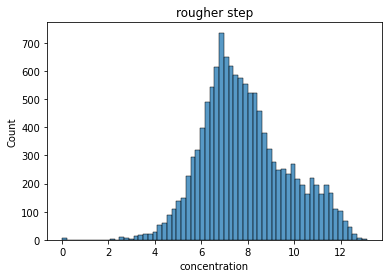

_________________
Этап rougher:
Средняя концентрация .output.concentrate_au: 19.611547102275516 +- 3.5059768108408447
Пропусков в столбце: 0


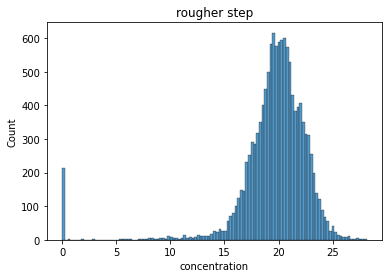

_________________
Этап primary_cleaner:
Средняя концентрация .output.concentrate_au: 32.45419952082138 +- 5.481556754839819
Пропусков в столбце: 0


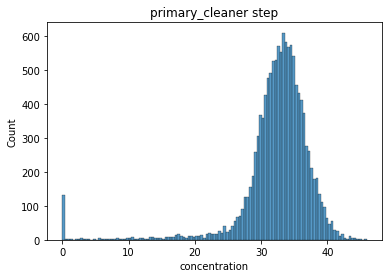

_________________
Этап final:
Средняя концентрация .output.concentrate_au: 44.09227926085609 +- 4.469787149756651
Пропусков в столбце: 0


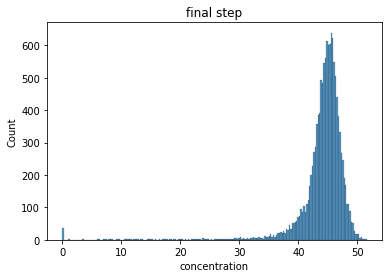

In [21]:
cycle_through_steps('au')

Наблюдается анамально много нулевых значений. Вероятнее всего при некоторых конфигурациях получается очень мало продукта

Концентрация золота ожидаемо растет с каждым этапом.

Так же стоит заметить, что при очистке распределение стремится к нормальному

#### Серебро

_________________
Этап rougher:
Средняя концентрация .input.feed_ag: 8.58264518484057 +- 1.886908387511635
Пропусков в столбце: 0


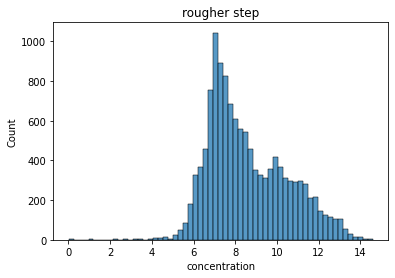

_________________
Этап rougher:
Средняя концентрация .output.concentrate_ag: 11.790123117326752 +- 2.5892717832600676
Пропусков в столбце: 0


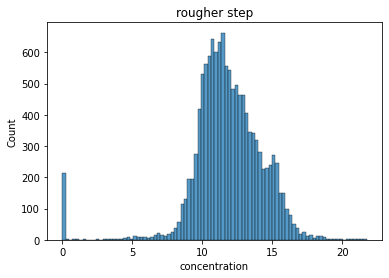

_________________
Этап primary_cleaner:
Средняя концентрация .output.concentrate_ag: 8.248937848529977 +- 1.951048638039553
Пропусков в столбце: 0


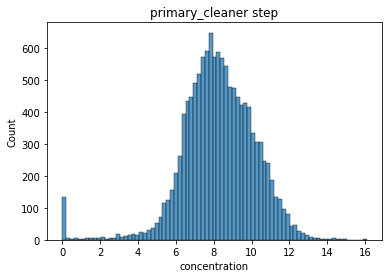

_________________
Этап final:
Средняя концентрация .output.concentrate_ag: 5.112700973925577 +- 1.3564685210461325
Пропусков в столбце: 1


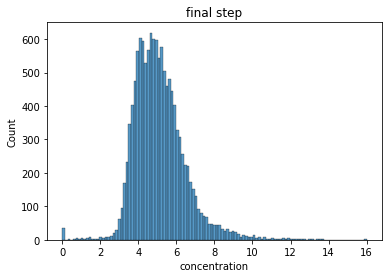

In [22]:
cycle_through_steps('ag')

Концентрация серебра наоборот падает

#### Свинец

_________________
Этап rougher:
Средняя концентрация .input.feed_pb: 3.5253779359222235 +- 1.0798228190600996
Пропусков в столбце: 0


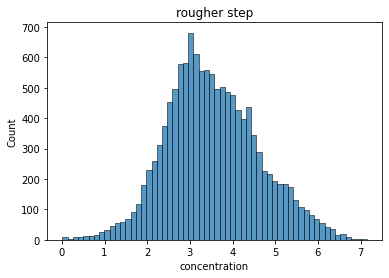

_________________
Этап rougher:
Средняя концентрация .output.concentrate_pb: 7.7331543874629824 +- 1.7548766699084002
Пропусков в столбце: 0


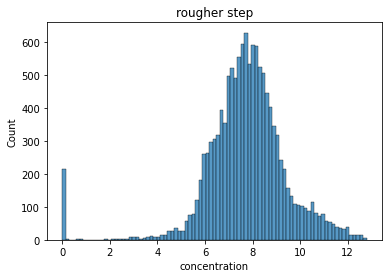

_________________
Этап primary_cleaner:
Средняя концентрация .output.concentrate_pb: 9.624350707566874 +- 2.629372733416603
Пропусков в столбце: 66


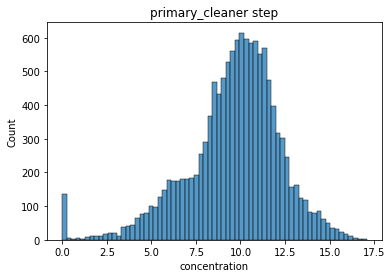

_________________
Этап final:
Средняя концентрация .output.concentrate_pb: 10.19381035940789 +- 1.6017251540498774
Пропусков в столбце: 1


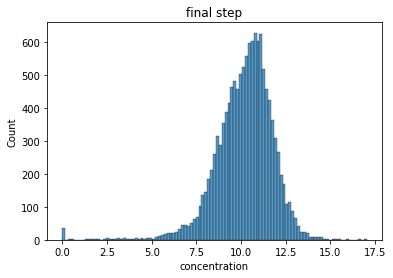

In [23]:
cycle_through_steps('pb')

Концентрация свинца растет

**Выводы**: Концентрация золота и свинца с каждым этапом растет, концентрация серебра падает. Есть много примеров, где концентрация близка (или равна) нулю.

### Распределение размеров гранул

In [24]:
def size_hist(df_train, df_test, step: str, x_range: list = [20, 120]):
    sbs.histplot(df_train, x=step + '.input.feed_size', color='blue', alpha=0.5, label='train set', stat='density')
    sbs.histplot(df_test, x=step + '.input.feed_size', color='red', alpha=0.5, label='test set', stat='density')
    plt.xlim(x_range)
    plt.grid()
    plt.legend()

### Этап флотации

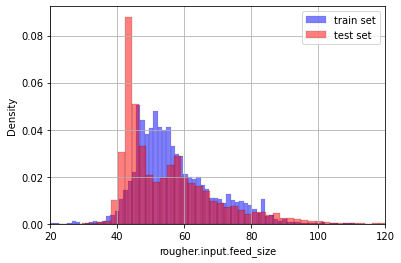

In [25]:
size_hist(train_set_nonan, test_set_nonan, 'rougher')

Распределения отличаются, но незначительно.

### Этап первичной очистки

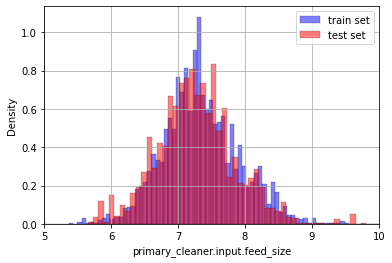

In [26]:
size_hist(train_set_nonan, test_set_nonan, 'primary_cleaner', [5, 10])

Распределения на этом этапе практически идентичны

### Суммарная концентрация

In [27]:
def calculate_sum(step: str):
    print(f"Этап {step}")
    if step == 'input':
        step = 'rougher.input.feed_'
    else:
        step += '.output.concentrate_'
    concentration_sum = train_set_nonan[[step + 'au', step + 'ag', step + 'pb', step + 'sol']].sum(axis=1)
    print(f'Среднее значение: {concentration_sum.mean()} +- {concentration_sum.std()}')
    sbs.histplot(concentration_sum)
    plt.title('Sum concentration')

#### Сырая концентрация

Этап input
Среднее значение: 56.38899688601989 +- 6.765005062839049


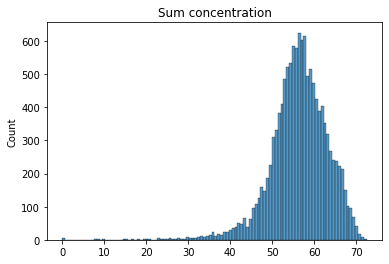

In [28]:
calculate_sum('input')

#### Черновая концентрация

Этап rougher
Среднее значение: 67.58261383846909 +- 11.888300085478823


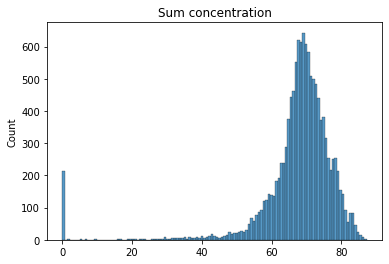

In [29]:
calculate_sum('rougher')

#### Финальная концентрация

Этап final
Среднее значение: 68.5778640910366 +- 6.420816897156155


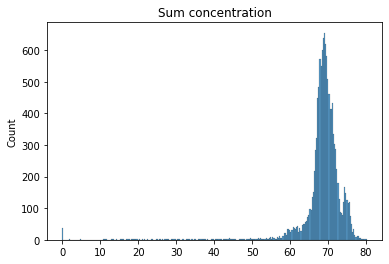

In [30]:
calculate_sum('final')

Концентрация выросла после флотации. Средняя финальная концентрация не сильно отличается от среднего концентрации после флотации, однако уменьшилась стандартное отклонение (Результат сходится к среднему значению 68,5%)

Стоит обратить внимание на нулевые значения: крайне маловероятно что концетрация всех металлов сразу будет равна нулю, поэтому следует удалить примеры с нулевой общей концентрацией

In [31]:
sum_of_metals_rougher = train_set_nonan[['rougher.output.concentrate_au',
                                 'rougher.output.concentrate_ag',
                                 'rougher.output.concentrate_pb',
                                 'rougher.output.concentrate_sol']].sum(axis=1)
train_set_nonan = train_set_nonan[sum_of_metals_rougher != 0]
train_set_nonan.shape

(12469, 87)

In [32]:
sum_of_metals_final = train_set_nonan[['final.output.concentrate_au',
                                 'final.output.concentrate_ag',
                                 'final.output.concentrate_pb',
                                 'final.output.concentrate_sol']].sum(axis=1)
train_set_nonan = train_set_nonan[sum_of_metals_final != 0]
train_set_nonan.shape

(12434, 87)

Этап rougher
Среднее значение: 68.7203607412444 +- 8.076544782197486


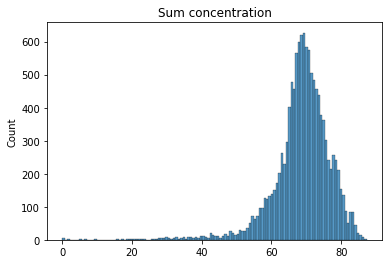

In [33]:
calculate_sum('rougher')

Этап final
Среднее значение: 68.77973922151736 +- 5.215055891184526


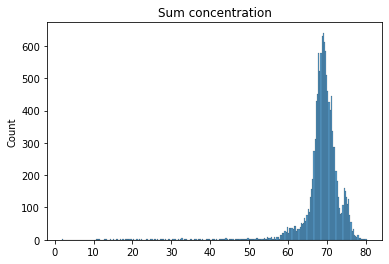

In [34]:
calculate_sum('final')

## Обучение модели

### sMAPE

In [35]:
def sMAPE(y_true, y_pred):
    y_true = y_true.to_numpy()
    y_true += 0.0001 # Для случаев, когда предсказание = истинное значение = 0
    y_pred += 0.0001
    result = 25 / y_true.shape[0] * (np.abs(y_true[:,0] - y_pred[:,0]) / (np.abs(y_true[:,0]) + np.abs(y_pred[:,0]))).sum() * 2
    result += 75 / y_true.shape[0] * (np.abs(y_true[:,1] - y_pred[:,1]) / (np.abs(y_true[:,1]) + np.abs(y_pred[:,1]))).sum() * 2
    return result

sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

### Выделение целевого признака

In [36]:
X_train = train_set_nonan[test_set_nonan.columns].drop('date', axis=1)
y_train = train_set_nonan[['rougher.output.recovery', 'final.output.recovery']]
X_train.shape

(12434, 52)

In [37]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [38]:
diff_in_columns = (train_set.columns.difference(test_set.columns)).append(pd.Index(['date']))
test_set_full = test_set_nonan.merge(right=full_set[diff_in_columns], on='date')
test_set_full.shape


(5229, 87)

In [39]:
X_test = test_set_full[test_set_nonan.columns].drop('date', axis=1)
y_test = test_set_full[['rougher.output.recovery', 'final.output.recovery']]
X_test.shape

(5229, 52)

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Скейлинг

Проведем скалирование данных

In [38]:
#scaler = StandardScaler().fit(X_train)

In [39]:
#X_train = scaler.transform(X_train)

In [40]:
#X_test = scaler.transform(X_test)

### Выбор модели

Необходимо решить задачу регрессии. Проверим несколько моделей. Для проверки адекватности и для сравнения, сначала сделаем дамми модель

#### Dummy model

In [42]:
model = DummyRegressor().fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, scoring=sMAPE_score)
abs(score.mean())

8.934382291454998

#### Linear regression

In [43]:
model = LinearRegression()

score = cross_val_score(model, X_train, y_train, scoring=sMAPE_score)
abs(score.mean())

6.686499507337272

#### Decision tree

In [44]:
%%time

model = DecisionTreeRegressor(random_state=42)

parameters = {'max_depth': [i for i in range(1, 20)]}

regr_tree = GridSearchCV(estimator=model, param_grid=parameters, scoring=sMAPE_score).fit(X_train, y_train)

CPU times: user 40.4 s, sys: 31.6 ms, total: 40.5 s
Wall time: 40.6 s


In [45]:
np.abs(regr_tree.best_score_)

5.9780273935688015

In [46]:
regr_tree.best_params_

{'max_depth': 11}

#### Random Forest

In [47]:
%%time

model = RandomForestRegressor(random_state=42, max_depth = 11)

parameters = {'n_estimators': [i for i in range(10, 60, 10)]}

regr_forest = GridSearchCV(estimator=model, param_grid=parameters, scoring=sMAPE_score, cv=3).fit(X_train, y_train)

CPU times: user 2min 8s, sys: 157 ms, total: 2min 8s
Wall time: 2min 8s


In [48]:
np.abs(regr_forest.best_score_)

5.0856058512825895

In [49]:
regr_forest.best_params_

{'n_estimators': 50}

In [50]:
regr_forest.cv_results_['mean_test_score']

array([-5.24080334, -5.13780536, -5.10327178, -5.09854617, -5.08560585])

Для оптимизации выберем n_estimators = 50. На всякий случай попробуем увеличить максимальную глубину

In [55]:
%%time

model = RandomForestRegressor(random_state=42, n_estimators=50)

parameters = {'max_depth': [i for i in range(11, 42, 5)]}

regr_forest = GridSearchCV(estimator=model, param_grid=parameters, scoring=sMAPE_score, cv=3).fit(X_train, y_train)

CPU times: user 6min 5s, sys: 508 ms, total: 6min 5s
Wall time: 6min 7s


In [56]:
np.abs(regr_forest.best_score_)

4.644464316649905

In [57]:
regr_forest.best_params_

{'max_depth': 26}

In [58]:
regr_forest.cv_results_['mean_test_score']

array([-5.08560585, -4.73907905, -4.66694507, -4.64446432, -4.65301009,
       -4.65377214, -4.65281191])

#### Gradient boosting

Для быстроты, проверим градиентный бустинг с использыванием лучшей max_depth из предыдущих моделей

In [59]:
%%time

model = GradientBoostingRegressor(random_state=42,
                                  n_estimators=200,
                                  learning_rate=0.05,
                                  max_depth=11
                                  )
estimator = MultiOutputRegressor(model)

score_11 = cross_val_score(estimator, X_train, y_train, cv=3, scoring=sMAPE_score)

CPU times: user 7min 41s, sys: 292 ms, total: 7min 42s
Wall time: 7min 43s


In [63]:
np.abs(score_11).mean()

4.606442650364724

In [64]:
%%time

model = GradientBoostingRegressor(random_state=42,
                                  n_estimators=200,
                                  learning_rate=0.05,
                                  max_depth=26
                                  )
estimator = MultiOutputRegressor(model)

score_26 = cross_val_score(estimator, X_train, y_train, cv=3, scoring=sMAPE_score)

CPU times: user 10min 45s, sys: 1.99 s, total: 10min 47s
Wall time: 10min 47s


In [65]:
np.abs(score_26).mean()

6.015238541766679

### Проверка на тестовом множестве

Самой лучше моделью оказалась модель градиентного бустинга с max_depth = 11. Проверим модель на тестовом множестве

In [67]:
%%time

model =  GradientBoostingRegressor(random_state=42,
                                  n_estimators=200,
                                  learning_rate=0.05,
                                  max_depth=11
                                  )
final_model = MultiOutputRegressor(model).fit(X_train, y_train)

CPU times: user 4min 13s, sys: 512 ms, total: 4min 14s
Wall time: 4min 14s


In [72]:
predictions = final_model.predict(X_test)
np.abs(y_test.to_numpy()[:10] - predictions[:10]) # Для доп наглядности посмотрим на абсолютную ошибку

array([[ 0.496352  ,  1.03339066],
       [ 1.64288338,  0.74818187],
       [ 0.50566383,  0.36645403],
       [ 1.13605568,  2.1513871 ],
       [ 1.98683835,  7.38756009],
       [ 4.15481547, 10.53013705],
       [ 1.27494598, 11.83808868],
       [ 4.32903028,  5.79707189],
       [ 4.64859081,  5.15773825],
       [ 2.05309162,  6.45818208]])

In [73]:
print(f'sMAPE метрика на тестовом наборе: {sMAPE(y_test, predictions):.2f}')

sMAPE метрика на тестовом наборе: 8.69


К сожалению, на тестовой выборке качество модели сильно проседает. Вероятнее всего это связано с тем, что тестовая выборке несколько отличается по распределению от тренировочной.

## Выводы

В процессе работы были:
 - Выполнена подготовка данных:
     - Загружены данные
     - Выполнена проверка оценки эффективности обогащения. Оценка в датасете верная
     - Проанализированы недоступные в тестовой выборке признаки. Недоступны все резуьтаты обработки руды вместе с целевыми признаками
     - Выполнена предобработка данных (удалены пропуски и ненужный столбец date)
 - Проведен анализ данных:
    - Изучено распределение концентратов различных металлов на всех этапах. Концетрация золота и свинца в среднем возрастает, а концентрация серебра - падает
    - Изучены распределения размеров гранул тестовой и тренировочной выборок. Распределения не сильно отличаются
    - Изучены распределения суммарной концентрации металлов на всех этапах. После флотации концентрация в среднем возрастает, далее остается примерно постоянной. Удалены примеры с нулевыми значениями суммарной концентрации
 - Проведено обучение модели:
     - Написана функция метрики sMAPE
     - Выделены таргет признаки
     - выбрана модель градиентного бустинга
     - модель успешно протестирована на тестовом наборе данных